In [11]:
import os
import pandas as pd
import numpy as np

In [12]:
items = pd.read_csv('../main/datasets/1.0v/items.csv', sep = '|')
infos = pd.read_csv('../main/datasets/1.0v/infos.csv', sep = '|')
orders= pd.read_csv('../main/datasets/1.0v/orders.csv', sep = '|')

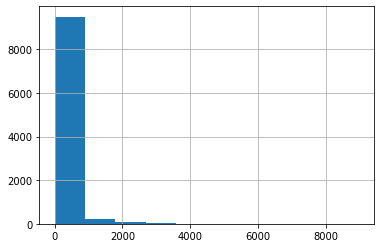

In [13]:
orders['itemID'].value_counts().hist()

In [4]:
print(orders)

                        time  transactID  itemID  order  salesPrice
0        2018-01-01 00:01:56     2278968     450      1       17.42
1        2018-01-01 00:01:56     2278968      83      1        5.19
2        2018-01-01 00:07:11     2255797    7851      2       20.47
3        2018-01-01 00:09:24     2278968     450      1       17.42
4        2018-01-01 00:09:24     2278968      83      1        5.19
...                      ...         ...     ...    ...         ...
2181950  2018-06-29 23:54:22     2040347    9217      1       23.50
2181951  2018-06-29 23:55:09     2260943    2175      1       11.60
2181952  2018-06-29 23:55:09     2260943    2061      1        1.03
2181953  2018-06-29 23:55:09     2260943    2195      1       18.73
2181954  2018-06-29 23:57:01        2525    8462      1       18.93

[2181955 rows x 5 columns]


In [15]:
print(items)

       itemID  brand  manufacturer  customerRating  category1  category2  \
0           1      0             1            4.38          1          1   
1           2      0             2            3.00          1          2   
2           3      0             3            5.00          1          3   
3           4      0             2            4.44          1          2   
4           5      0             2            2.33          1          1   
...       ...    ...           ...             ...        ...        ...   
10458   10459    180           253            0.00          8         44   
10459   10460      0           253            0.00          8         44   
10460   10461      0           253            0.00          8         44   
10461   10462    180           253            0.00          8         44   
10462   10463      0           253            0.00          8         44   

       category3  recommendedRetailPrice  
0              1                    8.84  
1

In [18]:
category = items[['itemID','category1','category2','category3']]
orders = pd.merge(orders, category, on='itemID')

In [27]:
print(orders['category1'].isna().sum())
print(orders['category2'].isna().sum())
print(orders['category3'].isna().sum())

0
0
0


In [36]:
orders.groupby('category1').agg({'salesPrice' : ['max', 'min','mean','std','count']}).round(1)

salesPrice                           
                 max  min   mean    std   count
category1                                      
1             9387.0  1.2   67.7  182.0  214430
2              709.6  0.4   35.2   39.2  429552
3             8529.4  1.2   99.1  309.4   43628
4             1430.0  0.0   18.5   22.9  433987
5              368.6  0.0   21.2   27.2  620744
6             2737.0  0.3   25.6  118.6  143766
7             1264.7  0.0   22.5   33.9  199665
8             9053.1  0.0  174.1  423.9   96183

todas as categorias1 apresentam um grande desvio prad~ao dos preços

In [35]:
orders.groupby('category2').agg({'salesPrice' : ['max', 'min','mean','std','count']}).round(1)

salesPrice                            
                 max   min   mean    std   count
category2                                       
1             9387.0   1.3   67.5  190.4   82314
2               88.5   1.5   26.3   18.9    9307
3             3304.6   1.7   59.0  228.3   17056
4             5586.6   2.5   77.4  177.1   26967
5             3491.0   1.2   82.4  192.3   51312
6             1087.5   1.2   42.0   59.8   25226
7             8813.1   1.8  145.3  382.9    2248
8              595.1   0.4   32.9   33.7  231991
9              272.0   0.8   38.2   39.8   23634
10             278.5   1.0   36.0   36.3  103269
11             649.0   1.0   38.4   47.5   61526
12             370.4   2.0   31.7   47.7   12113
13              96.5   3.7   26.7   15.4     960
14            1430.0   1.9   16.1   47.0   33028
15             192.4   0.0    6.3    6.9    5622
16            2737.0   2.2  105.0  400.2   10003
17             709.6   0.6   60.2   96.6    8172
18            2350.3   0.3   16.9   85.8   33628
19             950.4   0.6   20.7   33.5   90587
20             204.5   1.7    9.1    8.9    1830
21              65.6   0.7   17.1   13.1  193197
22              88.4   1.7   21.8   19.5    7119
23             300.5   0.0   20.9   18.0  147277
24             313.7   0.0   23.2   27.8   50126
25             334.1   0.6   53.7  107.3    1582
26            1264.7  10.8  451.0  465.6     265
27             148.5   6.5   31.3   26.1     599
28             197.6   0.4   25.8   31.8  111822
29             849.4   1.2   72.8  121.7   15686
30             368.6   0.8   89.9   89.3   19266
31              71.3   1.8   14.0   13.4    6617
32              99.9   0.8   17.9   14.0  290837
33             192.0  40.9   97.9   67.2     220
34            8529.4   3.3  293.5  612.2    9212
35             735.6  12.5  223.6  329.0     100
36             108.7  10.2   56.6   10.3      79
37             210.2   5.3   75.1   69.4      16
38             181.9   0.0   18.3   16.8  114286
39             178.0   0.9   19.0   20.0  185075
40              67.2   2.5   18.8   15.0   29287
41              60.0   0.9   11.3    8.6   24209
42             203.1   1.1   21.6   28.4   48102
43            2560.8   2.0   78.1  181.4   18171
44            9053.1   2.8  220.7  488.6   66359
45             603.7   0.0   22.7   60.9    2403
46              91.7   3.9   29.0   20.8     131
47            8222.5   4.1   59.0  228.6    5727
48            1045.0  15.6  191.4  188.2    1000
49            1029.6  30.2   70.3  109.1     987
50              39.3   1.6   17.6   11.9    1120
51               2.6   2.1    2.6    0.0     202
52              13.2   5.0    6.2    1.8      83

In [37]:
orders.groupby('category3').agg({'salesPrice' : ['max', 'min','mean','std','count']}).round(1)

salesPrice                           
                 max  min   mean    std   count
category3                                      
1             9387.0  1.2   67.7  182.0  214430
2              709.6  0.4   35.3   39.6  436570
3             2737.0  0.3   29.5  116.3  169727
4              368.6  0.0   21.2   27.2  621438
5             8529.4  1.8  190.5  510.4   14337
6             1264.7  0.0   22.7   33.0  197730
7             1430.0  0.0   18.5   23.0  431528
8             9053.1  0.0  174.1  423.9   96195

In [38]:
len(orders)

2181955

In [52]:
aux = orders.groupby('itemID').aggregate({'order' : ['sum','count'],'category1': ['mean'],'category2': ['mean'],'category3': ['mean']})
aux.sort_values(('order', 'sum'), ascending=False)

order       category1 category2 category3
          sum count      mean      mean      mean
itemID                                           
7789    12184  7415         4        39         7
5035    11908  8973         5        21         4
5117     9100  8063         5        21         4
4297     8675  3128         6        18         3
5039     8444  4433         5        28         4
...       ...   ...       ...       ...       ...
2983        1     1         2        10         2
2981        1     1         2         9         2
2969        1     1         2         9         2
6900        1     1         7        24         6
10463       1     1         8        44         8

[9840 rows x 5 columns]

In [54]:
aux = orders.groupby('category1').aggregate({'order' : ['sum','count']})
aux.sort_values(('order', 'sum'), ascending=False)

order        
              sum   count
category1                
5          779483  620744
4          625845  433987
2          443290  429552
7          260583  199665
1          234917  214430
6          216306  143766
8           99801   96183
3           55334   43628